In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/Cleaned Data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df.drop('Survived', axis=1)
y = df[['Survived']]

X = X.iloc[:, :].values
y = y.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
model = DecisionTreeClassifier()

In [3]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
model.score(X_train, y_train)

0.9466292134831461

In [6]:
y_pred = model.predict(X_test)

In [7]:
confusion_matrix(y_test, y_pred)

array([[92, 13],
       [21, 53]])

[<matplotlib.text.Text at 0x1116481d0>, <matplotlib.text.Text at 0x111627940>]

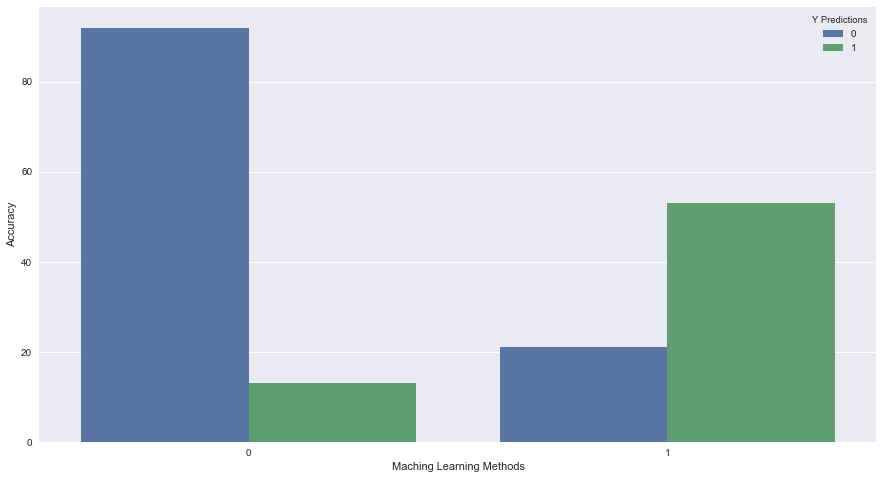

In [8]:
results = pd.DataFrame()
results['Y Test'] = y_test
results['Y Predictions'] = y_pred

fig = plt.figure(figsize=(15,8))
fig = sns.countplot(x=results['Y Test'], hue=results['Y Predictions'])
fig.set(ylabel="Accuracy", xlabel="Maching Learning Methods")